## PILLOW (PIL = Python Image Library)
# for image manipulation. PIL displays the image in photo viewer
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# to show the images

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image = Image.open("C:\\Users\\KRINA\\OneDrive\\Pictures\\PythonProInd\\cat.jpeg")

In [1]:
# image.show() This opens photo viewer
plt.imshow(image)

NameError: name 'plt' is not defined

In [12]:
print(image.size) # this gives width and height
print(image.format) # format of the image
print(image.mode) #channel format (HSV, RBG, BGR etc)
# HSV : hue saturation value
image.save('newimage.jpg')

(500, 523)
JPEG
RGB


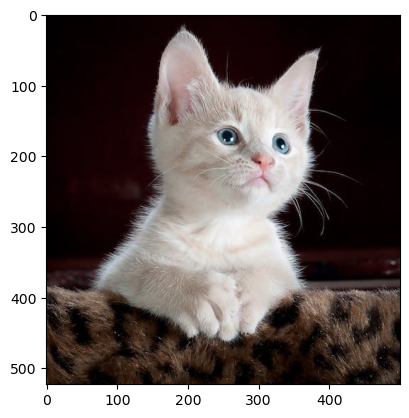

In [17]:
left = 50
top = 120
right = 250
bottom = 230
crop_img = image.crop((left,top, right, bottom))
plt.imshow(crop_img)
copy_img = image.copy()
plt.imshow(copy_img)

In [26]:
# Transposing allows us to change the orientation of an image.
# there are 6 transposing methods : 
trans_img1 = image.transpose(Image.FLIP_LEFT_RIGHT)
trans_img2 = image.transpose(Image.FLIP_TOP_BOTTOM)
trans_img3 = image.transpose(Image.ROTATE_90)
trans_img4 = image.transpose(Image.ROTATE_180)
trans_img5 = image.transpose(Image.ROTATE_270)
trans_img6 = image.transpose(Image.TRANSPOSE)
# plt.imshow(trans_img1)
# plt.imshow(trans_img2)
# plt.imshow(trans_img3)
# plt.imshow(trans_img4)
# plt.imshow(trans_img5)
# plt.imshow(trans_img6) Rows = Columns

Text(0.5, 1.0, 'Lanczos')

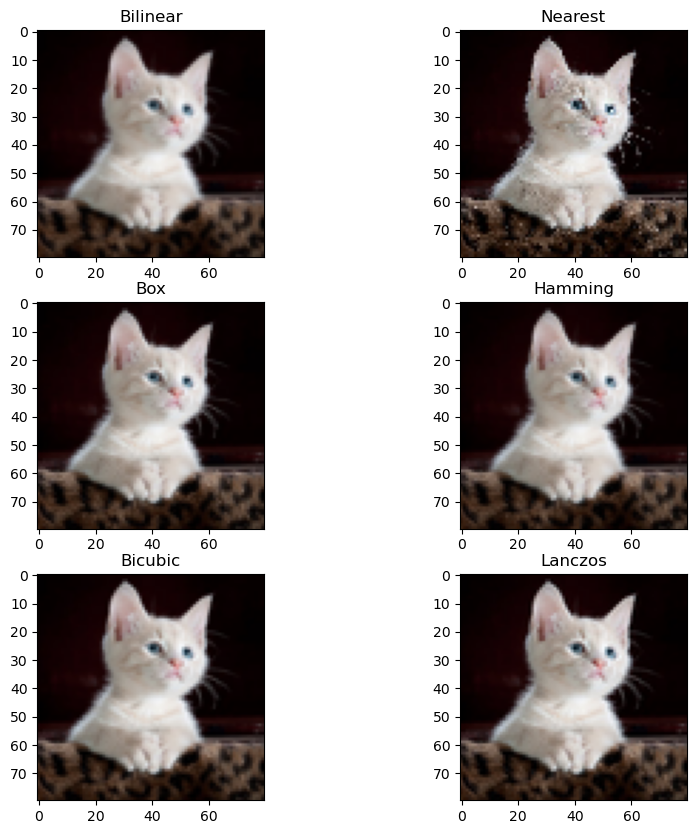

In [9]:
# Resizing 
# changes the size of the image in terms of width and height.
# function accepts dual tuples pair that is the new size of image
# returns image object
# reducing or increasing the size involves various algorithm known as 
# interpolations
# Interpolation techniques :
# nearest, box, bilinear, 
# Nearest : pick one nearest pixel from the input image. ignore all other 
# input pixels. simple techniques, results are kind of poor. [Poor quality]
# Box : each pixel of source image contributes to one pixel of the [NR]
# destination image with identical weights. for upscaling is equivalent of 
# NEAREST 
# Bilinear: for resize calculate the output pixel value using linear
# interpolation on all pixels that may contribute to the op value.[decent qua
# Hamming : Produce a sharper image than bilinear, doesn't have dislocation 
# on local level like with BOX.
# BICUBIC: one of the better ones,more expensive time-wise [better qua]
# LANCZOS: one of the better ones, more expensive time-wise [better qua ]
# but using deep learning, we can produce high quality of images
newsize = (80,80)
plt.figure(figsize = (10,10))
re_img1 = image.resize(newsize,Image.BILINEAR)
re_img2 = image.resize(newsize,Image.NEAREST)
re_img3 = image.resize(newsize,Image.BOX)
re_img4 = image.resize(newsize,Image.HAMMING)
re_img5 = image.resize(newsize,Image.BICUBIC)
re_img6 = image.resize(newsize,Image.LANCZOS)
plt.subplot(3,2,1)
plt.imshow(re_img1)
plt.title('Bilinear')
plt.subplot(3,2,2)
plt.imshow(re_img2)
plt.title('Nearest')
plt.subplot(3,2,3)
plt.imshow(re_img3)
plt.title('Box')
plt.subplot(3,2,4)
plt.imshow(re_img4)
plt.title('Hamming')
plt.subplot(3,2,5)
plt.imshow(re_img5)
plt.title('Bicubic')
plt.subplot(3,2,6)
plt.imshow(re_img6)
plt.title('Lanczos')

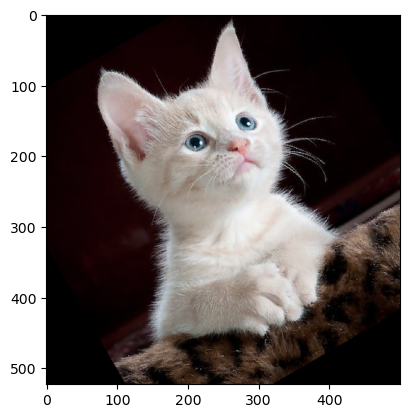

In [16]:
r_img = image.rotate(30)
plt.imshow(r_img)

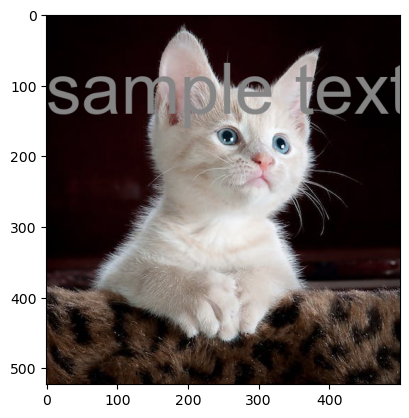

In [3]:
# text watermarks
from PIL import ImageFont
from PIL import ImageDraw
water = image.copy()
draw = ImageDraw.Draw(water)
font = ImageFont.truetype('arial.ttf', 100)
# (pos, text, fill_color, font_object)
draw.text((0,50),'sample text',(133,133,133), font = font)
plt.imshow(water)

In [5]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

class ImageProcessingApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Processing App")

        self.image_label = tk.Label(master)
        self.image_label.pack()

        self.load_button = tk.Button(master, text="Load Image", command=self.load_image)
        self.load_button.pack()

    def load_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            image = Image.open("C:\\Users\\KRINA\\OneDrive\\Pictures\\PythonProInd\\cat.jpeg")
            photo = ImageTk.PhotoImage(image)
            self.image_label.configure(image=photo)
            self.image_label.image = photo  # Keep a reference to avoid garbage collection

def main():
    root = tk.Tk()
    app = ImageProcessingApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()


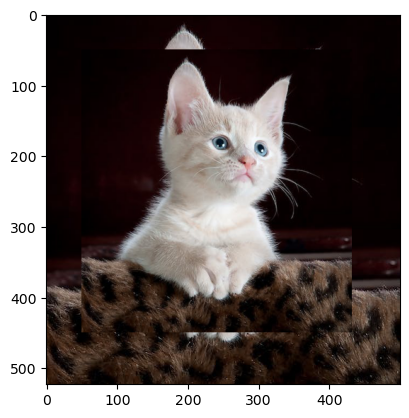

In [9]:
size = (400,400)
crop_img = image.copy()
crop_img.thumbnail(size)
copied_img = image.copy()
copied_img.paste(crop_img,(50,50))
plt.imshow(copied_img)

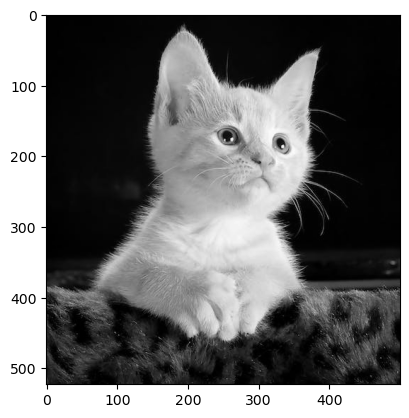

In [12]:
bw = image.convert('L')
plt.imshow(bw, cmap = 'gray')

HSV


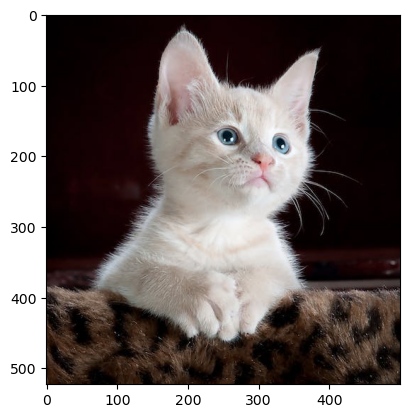

In [15]:
newfr = image.convert('HSV')
print(newfr.mode)
plt.imshow(newfr)

In [17]:
a = np.array(image)
print(a.shape)
# numpy does height and width form but pil does it in 

(523, 500, 3)


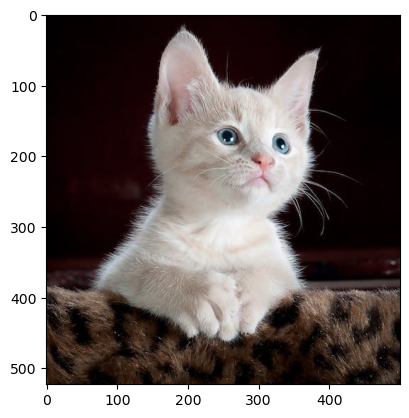

In [19]:
a1 = Image.fromarray(a)
plt.imshow(a1)

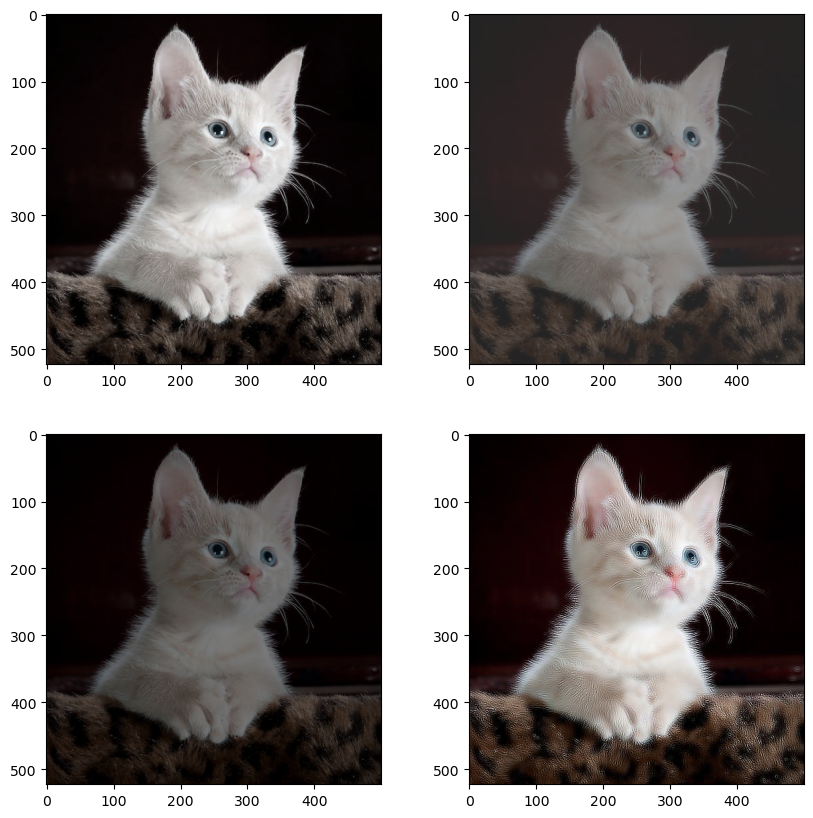

In [26]:
# Image inhancements:
# 1.0 is the default above is increasing and below it is decreasing
from PIL import ImageEnhance
plt.figure(figsize=(10,10))
image_col = image.copy()
i1 = ImageEnhance.Color(image_col).enhance(.5)
i2 = ImageEnhance.Contrast(image_col).enhance(.5)
i3 = ImageEnhance.Brightness(image_col).enhance(.5)
i4 = ImageEnhance.Sharpness(image_col).enhance(-5.5)
plt.subplot(2,2,1)
plt.imshow(i1)
plt.subplot(2,2,2)
plt.imshow(i2)
plt.subplot(2,2,3)
plt.imshow(i3)
plt.subplot(2,2,4)
plt.imshow(i4)

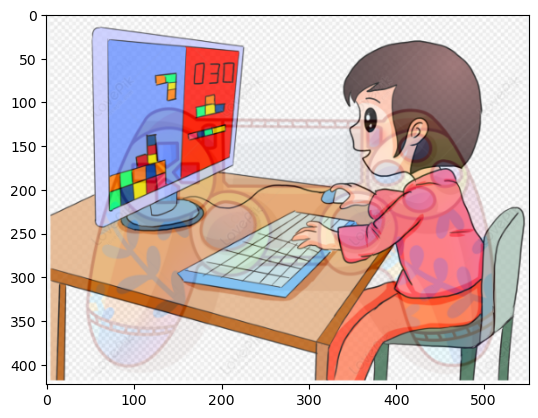

In [34]:
# Alpha blending
# it is the mixing of 2 images. it is combining of the alpha channel with 
# other layer in an image in order to show iranslucency.
# out = image * (1.0 - alpha) + image2 * alpha
# if the alpha is 0.0, a copy of the first image is returned. if the alpha is
# 1.0, a copy of the second image is returned. There are no restictions on
# the alpha value. If necessary, the result is clipped to fit into the 
# allowed output range (0 and 1)
# there are 2 rules for blending 2 images:
# 1. make sure image are of same size
# 2. the images have the alpha channe (*png format)
# the function blend of image module takes three parameters. first two takes
# the images to blend and third parameter takes the alpha number. it varies
# between 0 to 1. this number responsible for varying the translucency 
# between two images.
# images has to be in png form
image1 = Image.open("C:\\Users\\KRINA\\OneDrive\\Pictures\\pc.png")
image2 = Image.open("C:\\Users\\KRINA\\OneDrive\\Pictures\\gz.png")
img1 = image1.copy()
img2 = image2.copy()
img2 = image2.resize(img1.size)
ib = Image.blend(img1,img2, 0.5)
plt.imshow(ib)

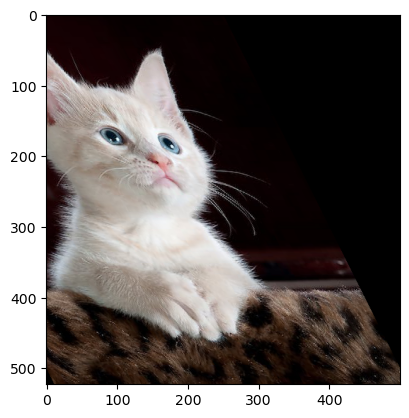

In [36]:
# Image transform to convert it from one domain to another.
# Affine transform: it is a type of transform in which it preserve straight line
# ,points and planes. the parallel lines/rows same after the transform.
# data is a 6 tuple (a,b,c,d,e,f) : a,b,c contains x pixel and y pixel: d,e,f
# which contains the first two rows from an affine transform
# matrix. for each pixel in the output image, the new value is taken from a 
# position (ax+by+c, dx+ey+f)
# Extent transform: it computes the minimum and maximum values for a data field.
# producing a [min,max] array. this transform is useful for computing a value
# range and binding it to a signal name.
# Quad map a quadrilateral to a rectangle
# mesh map a number of source quadrilaterals in one operation
it = image.copy()
it = it.transform(it.size, Image.AFFINE,(1,-0.5,0.5 * it.size[0],0,1,0))
plt.imshow(it)

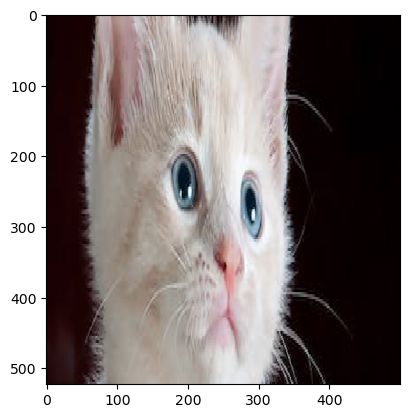

In [37]:
it = image.copy()
it = it.transform(it.size, Image.EXTENT,(100,100,it.size[0],it.size[1]//2))
plt.imshow(it)
# crop out the image and then zoom in

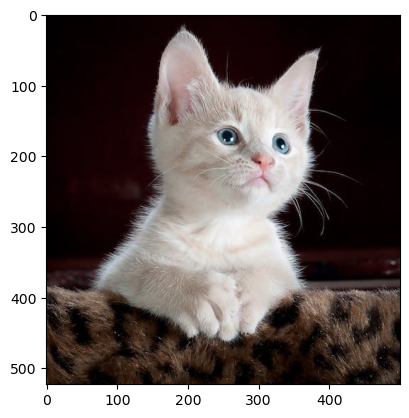

In [42]:
# Flipping channel: 
# ic = image.copy()
# r,g,b = ic.split()
# im = Image.merge('RGB',(r,g,b))
# plt.imshow(ic)

In [ ]:
imgtr = image.copy()


In [43]:
from PIL import Image, ImageChops, ImageFilter

In [49]:
imgtr = image.copy()
omgtr = image1.copy()
imgtr.size
# imgtr.mode
# omgtr.size
# omgtr.mode

(500, 523)

In [51]:
# mr = ImageChops.multiply(imgtr,omgtr)
# plt.imshow(mr)
# to multiply any two images the size & mode of those has to be equal
# ad = ImageChops.add(imgtr,omgtr)
# plt.imshow(ad) 
# add will give the common area between both the images


ValueError: images do not match

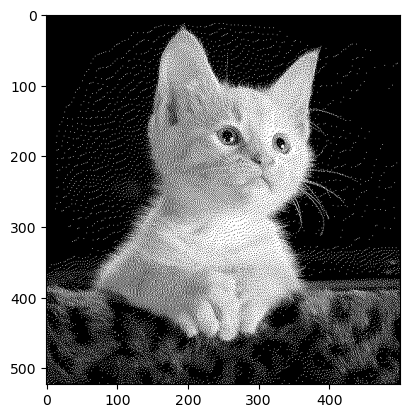

In [57]:
# Convert color code
binary = imgtr.convert('1')
plt.imshow(binary)


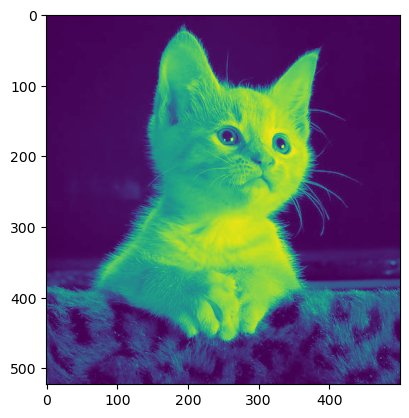

In [58]:
gr = imgtr.convert('L')
plt.imshow(gr)

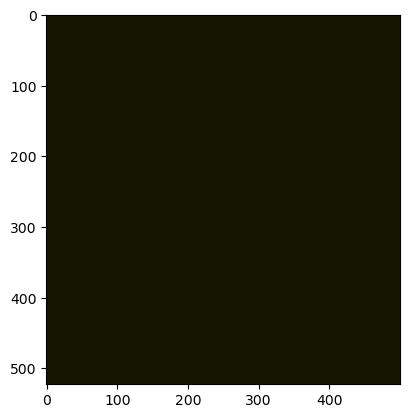

In [64]:
pixel = imgtr.load()
# this will map out each and every pixels in our image

for row in range(imgtr.size[0]):
    for col in range(imgtr.size[1]):
        if pixel[row,col] != (255,255,255):
            pixel[row,col] = (22,22,0)
plt.imshow(imgtr)

In [1]:
pix = gr.load()
for r in range(gr.size[0]):
    for c in range(gr.size[1]):
        if pix[r,c] != (255,255,255):
            pix[r,c] = (0,0,0)
plt.imshow(gr)

NameError: name 'gr' is not defined

In [8]:
from PIL import Image

def image_to_pixel_art(image_path, output_path, pixel_size=10, palette=None):
    """Convert the image to pixel art."""
    try:
        # Open the image
        img = Image.open("C:\\Users\\KRINA\\OneDrive\\Pictures\\PythonProInd\\cat.jpeg")
        
        # Resize the image to pixel art size
        img = img.resize((img.width // pixel_size, img.height // pixel_size), Image.NEAREST)

        # Apply color quantization if palette is provided
        if palette:
            img = quantize_colors(img, palette)

        # Resize back to original dimensions
        img = img.resize((img.width * pixel_size, img.height * pixel_size), Image.NEAREST)

        # Save the pixel art image
        img.save(output_path)
        print("Pixel art image saved successfully.")
        
        # Show the output image
        img.show()
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    # Example usage
    image_path = "input_image.jpg"
    output_path = "output_pixel_art.png"
    pixel_size = 10  # Change this according to desired pixel size
    palette = [(255, 255, 255), (0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Custom palette colors

    image_to_pixel_art(image_path, output_path, pixel_size, palette)


Pixel art image saved successfully.
